In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train = pd.read_csv('Datasets/train_mnist.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,6304.000000,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,...,6303.000000,6303.000000,6303.000000,6303.0,6303.0,6303.0,6303.0,6303.0,6303.0,6303.0
mean,4.440355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.139616,0.142313,0.026971,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.885613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.100344,5.531528,1.675680,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train.fillna(0, inplace=True)

In [6]:
y = train['label']
X = train.drop('label', axis=1)

In [11]:
def show_images(num_images):
    """This function plots the num_images provided of MNIST dataset.
    INPUT :: num_images - int - The number of images you would like to view.
    
    OUPUT :: A figure with the images shown for the training data"""
    
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0, num_images):
            plt.subplot(num_images/10, 10, digit_num+1) # Create Subplots
            mat_data = X.iloc[digit_num].values.reshape(28,28)
            plt.imshow(mat_data)
            plt.xticks([])
            plt.yticks([])
    else:
        print('That is not the right input, please read the docstring before continuing.')        

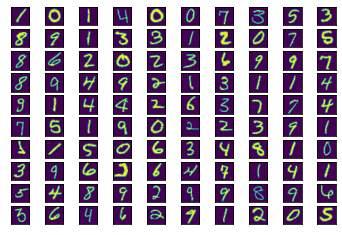

In [12]:
show_images(100)

In [13]:
def show_images_by_digit(digit_to_see):
    if digit_to_see in list(range(10)):
        indices = np.where(y == digit_to_see)
        for digit_num in range(0, 50):
            plt.subplot(5, 10, digit_num+1)
            mat_data = X.iloc[indices[0][digit_num]].values.reshape(28,28)
            plt.imshow(mat_data)
            
            plt.xticks([])
            plt.yticks([])
    else:
        print('That is not the right input, please read the docstring before continuing.')        

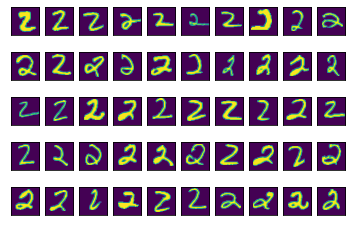

In [14]:
show_images_by_digit(2)

[[198   0   2   0   0   1   8   0   0   0]
 [  0 235   3   0   0   0   1   2   2   0]
 [  1   3 217   0   2   0   0   5   0   0]
 [  2   0   5 175   0   6   0   1   1   1]
 [  0   0   1   0 168   0   2   0   0   7]
 [  2   1   0   5   1 171   4   0   2   0]
 [  2   0   0   0   0   1 205   2   1   0]
 [  0   0   6   2   3   0   0 207   1   6]
 [  1   2   0   5   0   4   1   0 187   2]
 [  2   1   1   2   8   0   0   2   3 189]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.9380105718404613


0.9380105718404613

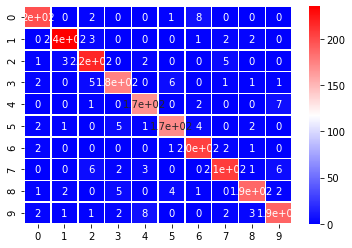

In [19]:
def fit_random_forest_classifier(X, y):
    '''
    INPUT: names are pretty self explanatory
    OUTPUT: none - prints the confusion matrix and accuracy
    '''
    #First let's create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)

    #score
    mat = confusion_matrix(y_test, y_preds)
    print(mat)
    print(sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5))
    acc = accuracy_score(y_test, y_preds)
    print(acc)
    return acc
    
fit_random_forest_classifier(X, y)

In [20]:
def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [21]:
pca, X_pca = do_pca(2, X)

In [22]:
X_pca.shape

(6304, 2)

[[109   0  42  11   7   8  25   0   7   0]
 [  0 208   0   4   2   8   3   6   8   4]
 [ 37   2  79  19  14  26  35   1  12   3]
 [ 11   1  33  24  21  26  24  11  25  15]
 [  7   4  16  20  51  16  14  14  12  24]
 [  7   9  32  25  18  20  30   2  31  12]
 [ 28   6  52  21  11  28  34   3  26   2]
 [  3   3   3  11  32   9   3  93   8  60]
 [  5   6  30  27  19  30  27   9  40   9]
 [  2  12   4  14  27  12   4  56  11  66]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.347909658817876


0.347909658817876

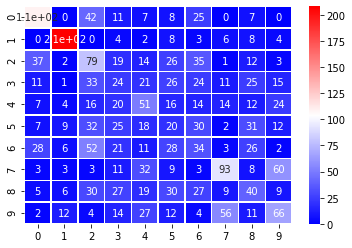

In [23]:
fit_random_forest_classifier(X_pca, y)

In [24]:
pca.components_.shape

(2, 784)

[[192   0   4   1   0   2   7   1   1   1]
 [  0 234   2   0   0   1   2   0   3   1]
 [  1   2 207   5   3   0   3   3   4   0]
 [  0   0   9 165   0   8   0   1   5   3]
 [  0   0   4   0 154   1   4   1   0  14]
 [  1   0   3   8   1 166   1   0   2   4]
 [  4   0   1   0   2   0 202   0   2   0]
 [  0   0   6   1   6   0   0 201   2   9]
 [  4   2   0  14   1   6   0   0 173   2]
 [  1   0   2   3  16   1   0  12   2 171]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.8962037481979818
[[193   0   3   1   0   2   8   1   1   0]
 [  0 233   2   0   0   1   2   0   5   0]
 [  2   2 206   5   3   0   3   3   4   0]
 [  0   0   9 164   0   7   0   2   8   1]
 [  0   0   4   0 156   1   4   1   0  12]
 [  1   0   1   7   2 167   0   0   4   4]
 [  3   0   2   0   3   2 201   0   0   0]
 [  0   0   8   2   3   0   1 195   2  14]
 [  3   2   2  10   2   8   0   0 174   1]
 [  1   0   2   2  14   1   0  14   2 172]]
AxesSubplot(0.125,0.125;0.496x0.755)
0.8942815953868333
[[195   0   2   0   0   1  

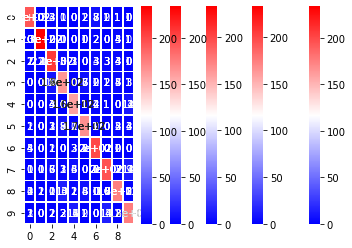

In [25]:
accs = []
for num_features in range(20, 100):
    pca, X_pca = do_pca(num_features, X)
    acc = fit_random_forest_classifier(X_pca, y)
    accs.append(acc)
    if acc > .9:
        break

In [26]:
print(len(accs))

5
